<a href="https://colab.research.google.com/github/matsl92/machine_learning/blob/main/classifiers/fertility_diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00244/fertility_Diagnosis.txt", names = ["Season", "Age", "C. diseases", "Accident", "S. intervention", "lyhfever", "Acfrequency", "Smoking", "sittinghours", "Output"])


In [3]:
df.head()

,Season,Age,C. diseases,Accident,S. intervention,lyhfever,Acfrequency,Smoking,sittinghours,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O


In [4]:
df.dtypes

Season             float64
Age                float64
C. diseases          int64
Accident             int64
S. intervention      int64
lyhfever             int64
Acfrequency        float64
Smoking              int64
sittinghours       float64
Output              object
dtype: object

In [5]:
df.describe()

,Season,Age,C. diseases,Accident,S. intervention,lyhfever,Acfrequency,Smoking,sittinghours
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-0.078900,0.669000,0.870000,0.440000,0.510000,0.190000,0.832000,-0.350000,0.406800
std,0.796725,0.121319,0.337998,0.498888,0.502418,0.580752,0.167501,0.808728,0.186395
min,-1.000000,0.500000,0.000000,0.000000,0.000000,-1.000000,0.200000,-1.000000,0.060000
25%,-1.000000,0.560000,1.000000,0.000000,0.000000,0.000000,0.800000,-1.000000,0.250000
50%,-0.330000,0.670000,1.000000,0.000000,1.000000,0.000000,0.800000,-1.000000,0.380000
75%,1.000000,0.750000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


El metodo describe nos entrega datos estadisticos del dataframe, como lo son la media, la desviación estandar, algunos percentiles, etc.

In [6]:
df.isnull().sum()

Season             0
Age                0
C. diseases        0
Accident           0
S. intervention    0
lyhfever           0
Acfrequency        0
Smoking            0
sittinghours       0
Output             0
dtype: int64

El metodo isnull acompañado de la función sum nos hace un conteo de los valores nulos que hay en cada columna del dataframe, en este caso el dataframe no tiene un solo dato nulo.

In [7]:
def value_counts_graphs(column_name):
    label_freq = df[column_name].value_counts() / len(df)
    plotting = label_freq.sort_values(ascending=False).plot.bar()
    return label_freq, plotting 

(-0.33    0.37
  1.00    0.31
 -1.00    0.28
  0.33    0.04
 Name: Season, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f72e13024d0>)

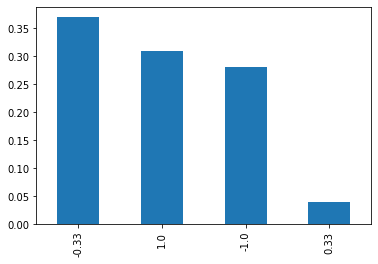

In [8]:
value_counts_graphs('Season')

La anterior gráfica nos muestra que un poco más de la tercera parte de las muestras fueron tomadas en primavera, siendo esta estación la más comun de todas, seguida por otoño e invierno respectivamente con valores cercanos al 30% de toda la muestra, y finalizamos con verano que obtuvo un valor de menos del 5% de las muestras.

(0.67    0.14
 0.56    0.12
 0.75    0.10
 0.53    0.09
 0.69    0.07
 0.50    0.07
 0.58    0.07
 0.78    0.07
 0.64    0.06
 0.81    0.05
 0.61    0.05
 0.94    0.02
 1.00    0.02
 0.72    0.02
 0.92    0.02
 0.86    0.01
 0.89    0.01
 0.83    0.01
 Name: Age, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f72e124d150>)

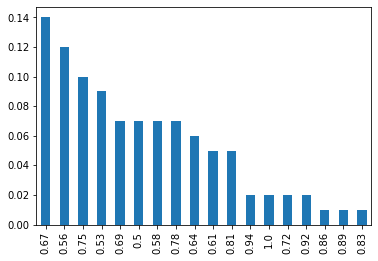

In [9]:
value_counts_graphs('Age')

(1    0.87
 0    0.13
 Name: C. diseases, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f72e0ce0f10>)

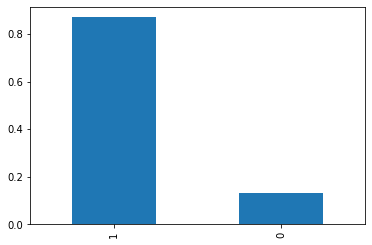

In [10]:
value_counts_graphs('C. diseases')

La anterior gráfica nos muestra que cerca del 90% de los hombres no presentaba alguna enfermedad de la infancia, contra un 10% que sí presentaba alguna de estas.

(0    0.56
 1    0.44
 Name: Accident, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f72e0c65a90>)

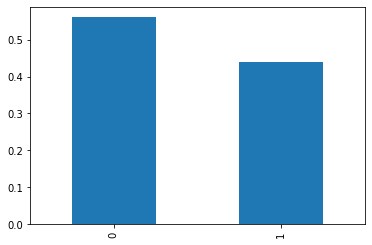

In [11]:
value_counts_graphs('Accident')

La mayoría de individuos analizados ha sufrido algún accidente o trauma serio.

(1    0.51
 0    0.49
 Name: S. intervention, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f72e0bd2550>)

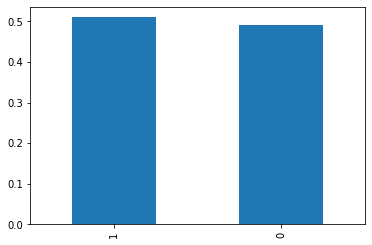

In [12]:
value_counts_graphs('S. intervention')

De manera muy equitativa se divide la muestra entre los individuos que han sido intervenidos quirúrgicamente y los que no, siendo los primeros los que predominan.

( 0    0.63
  1    0.28
 -1    0.09
 Name: lyhfever, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f72e0bc0050>)

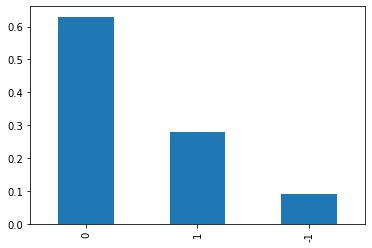

In [13]:
value_counts_graphs('lyhfever')

Un poco más del 60% de la muestra presentó fiebre en los ultimos tres meses, cerca del 30% presentó fiebre hace más de tres meses, y aproximadamente 10% de la muestra tuvo altas fiebres en el ultimo año.

(1.0    0.40
 0.8    0.39
 0.6    0.19
 0.2    0.01
 0.4    0.01
 Name: Acfrequency, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f72e0b2dfd0>)

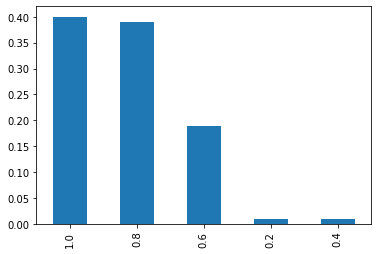

In [14]:
value_counts_graphs('Acfrequency')

Casi el 80% de la muestra consume alcohol ya sea una vez a la semana, casi nunca o nunca, miestras que menos del 5% lo consume una o varias veces al día.

(-1    0.56
  0    0.23
  1    0.21
 Name: Smoking, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f72e0b34110>)

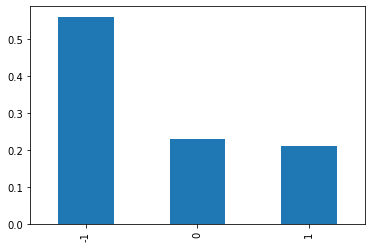

In [15]:
value_counts_graphs('Smoking')

Más del 50% de la muestra no fuma, la otra mitad se divide de manera muy pareja entre los que lo hacen ocasionalmente y diariamente.

(0.25    0.17
 0.50    0.16
 0.38    0.13
 0.31    0.11
 0.19    0.11
 0.63    0.10
 0.44    0.09
 0.88    0.03
 0.75    0.03
 0.56    0.02
 0.06    0.02
 0.13    0.01
 1.00    0.01
 0.47    0.01
 Name: sittinghours, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f72e0a27190>)

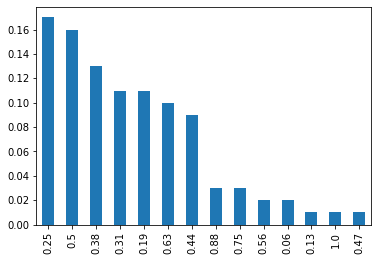

In [16]:
value_counts_graphs('sittinghours')

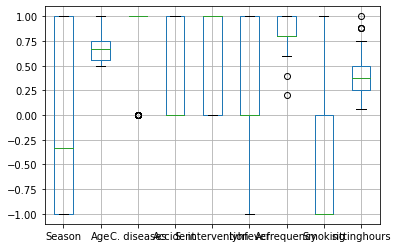

In [17]:
df.boxplot()

Para cada columna tenemos un gráfico que nos ubica el valor mínimo, el cuartil 1, la mediana, el cuartil 3 y el valor máximo de cada columna que representa uno de los atributos o caracteristicas que tienen los individuo de la muestra.
Por ejemplo, con respecto a la segunda columna, teniendo en cuenta que el rango de edad de los varones de la muestra va desde 18 hasta 36 años, y esto se representa en un rango entre 0 y 1, podemos interpretar que no hay individuo con menos de 27 años en la muestra, ya que el valor mínimo es de 0.50 que en el rango (18-36) equivale a 27.

In [18]:
df.head()

,Season,Age,C. diseases,Accident,S. intervention,lyhfever,Acfrequency,Smoking,sittinghours,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O


In [19]:
Y = df["Output"].apply(lambda x: 
                         1 if x[-1] == "N" else 0)

Por medio de una función lambda convertimos los datos de salida, originalmente expresados como N y O, en 1 o 0. con el fin de no presentar inconvenientes en la manipulación de los mismos. 1 representa un diagnóstico normal y 0 un diagnóstico alterado.

In [20]:
Y.head()

0    1
1    0
2    1
3    1
4    0
Name: Output, dtype: int64

Comprobamos el código anterior mostrando el encabezado de nuestra salida modificada.

In [21]:
df.head()

,Season,Age,C. diseases,Accident,S. intervention,lyhfever,Acfrequency,Smoking,sittinghours,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O


In [22]:
X = df.drop('Output', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [23]:
X.head()

,Season,Age,C. diseases,Accident,S. intervention,lyhfever,Acfrequency,Smoking,sittinghours
0,-0.33,0.69,0,1,1,0,0.8,0,0.88
1,-0.33,0.94,1,0,1,0,0.8,1,0.31
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50


In [24]:
min_ = MinMaxScaler()
min_.fit(X)
X = min_.transform(X)

#X = MinMaxScaler().fit_transform(X)
print('Min: ' + str(np.min(X, axis = 0)))
print('Max: ' + str(np.max(X, axis = 0)))
print(X)

Min: [0. 0. 0. 0. 0. 0. 0. 0. 0.]
Max: [1. 1. 1. 1. 1. 1. 1. 1. 1.]
[[0.335      0.38       0.         1.         1.         0.5
  0.75       0.5        0.87234043]
 [0.335      0.88       1.         0.         1.         0.5
  0.75       1.         0.26595745]
 [0.335      0.         1.         0.         0.         0.5
  1.         0.         0.46808511]
 [0.335      0.5        0.         1.         1.         0.5
  1.         0.         0.34042553]
 [0.335      0.34       1.         1.         0.         0.5
  0.75       0.         0.46808511]
 [0.335      0.34       1.         0.         1.         0.5
  0.75       0.5        0.46808511]
 [0.335      0.34       0.         0.         0.         0.
  0.75       0.         0.40425532]
 [0.335      1.         1.         1.         1.         0.5
  0.5        0.         0.34042553]
 [1.         0.28       0.         0.         1.         0.5
  0.75       0.         0.20212766]
 [1.         0.22       1.         0.         0.         0.5

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [26]:
print('Tamaño X: ' + str(len(X)))
print('Tamaño y: ' + str(len(Y)))
print('Tamaño X_train: ' + str(len(X_train)))
print('Tamaño y_train: ' + str(len(y_train)))
print('Tamaño X_test: ' + str(len(X_test)))
print('Tamaño y_test: ' + str(len(y_test)))

Tamaño X: 100
Tamaño y: 100
Tamaño X_train: 70
Tamaño y_train: 70
Tamaño X_test: 30
Tamaño y_test: 30


In [27]:
clf = Perceptron(tol=1e-3)
clf.fit(X_train, y_train)

Perceptron()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


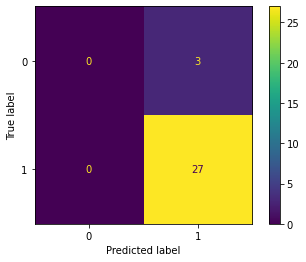

In [28]:
plot_confusion_matrix(clf, X_test, y_test) 

El modelo no fue 100% exacto, sin embargo, tuvo una presición y una exactitud del 90% inicialmente y tampoco produjo ningún falso negativo, lo que es bastante satisfactorio. 

In [29]:
y_pred = clf.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('tn: ' + str(tn))
print('fp: ' + str(fp))
print('fn: ' + str(fn))
print('tp: ' + str(tp))

tn: 0
fp: 3
fn: 0
tp: 27


In [30]:
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))
print('F1 score: ' + str(f1_score(y_test, y_pred)))
print('Precision: ' + str(precision_score(y_test, y_pred)))
print('Recall: ' + str(recall_score(y_test, y_pred)))

Accuracy: 0.9
F1 score: 0.9473684210526316
Precision: 0.9
Recall: 1.0


In [31]:
acc = []
for i in [1e-10,1e-4,1e-5,1e-2,1e0,1e1,1e2,1e-15]:
  clf = Perceptron(tol=i, max_iter=1000000000)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  acc.append(accuracy_score(y_test, y_pred))

[0.9, 0.9, 0.9, 0.9, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9]


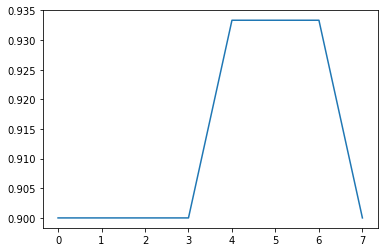

In [32]:
print(acc)
import matplotlib.pyplot as plt

plt.plot(acc)

Considero adecuado el uso del perceptrón simple para la clasificación de pacientes como diagnosticados o no diagnosticados con alguna patología, almenos como un primer filtro que clasifique a los pacientes y de acuerdo a dicha clasificación se les de una atención, tratamiento, o conjunto de evalucaiones correspondientes para determinar su estado verdadero. Esto ayudaría a agilizar procesos como el inicio de un tratamiento a quien lo requiere y la reducción de gastos al recomendar examenes y evaluaciones menos especializadas o complejas a los pacientes cuya clasificación indica no ser positivos.